In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [2]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 4
EPOCHS = 50
BATCH_SIZE = 32
input_shape = (SIZE, SIZE, CHANNELS)

In [3]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

Found 2430 images belonging to 4 classes.


In [24]:
validation_generator = validation_datagen.flow_from_directory(
        'Corn/valid',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")

Found 303 images belonging to 4 classes.


In [25]:
test_generator = test_datagen.flow_from_directory(
        'Corn/test',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 300 images belonging to 4 classes.


In [27]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 63, 63, 64)       

In [29]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // validation_generator.batch_size
)

C:\Users\ha\AppData\Local\Temp\ipykernel_6696\2109224549.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
75/75 [==============================] - 110s 1s/step - loss: 0.9788 - accuracy: 0.5534 - val_loss: 0.9413 - val_accuracy: 0.6771
Epoch 2/50
75/75 [==============================] - 105s 1s/step - loss: 0.6485 - accuracy: 0.7435 - val_loss: 0.5892 - val_accuracy: 0.7917
Epoch 3/50
75/75 [==============================] - 103s 1s/step - loss: 0.4331 - accuracy: 0.8420 - val_loss: 0.9057 - val_accuracy: 0.6285
Epoch 4/50
75/75 [==============================] - 97s 1s/step - loss: 0.3095 - accuracy: 0.8928 - val_loss: 0.7186 - val_accuracy: 0.7674
Epoch 5/50
75/75 [==============================] - 97s 1s/step - loss: 0.1908 - accuracy: 0.9337 - val_loss: 0.6547 - val_accuracy: 0.7431
Epoch 6/50
75/75 [==============================] - 99s 1s/step - loss: 0.1583 - accuracy: 0.9450 - val_loss: 0.7116 - val_accuracy: 0.6528
Epoch 7/50
75/75 [==============================] - 100s 1s/step - loss: 0.1417 - accuracy: 0.9550 - val_loss: 0.3454 - val_accuracy: 0.9167
Epoch 8/50
75/75

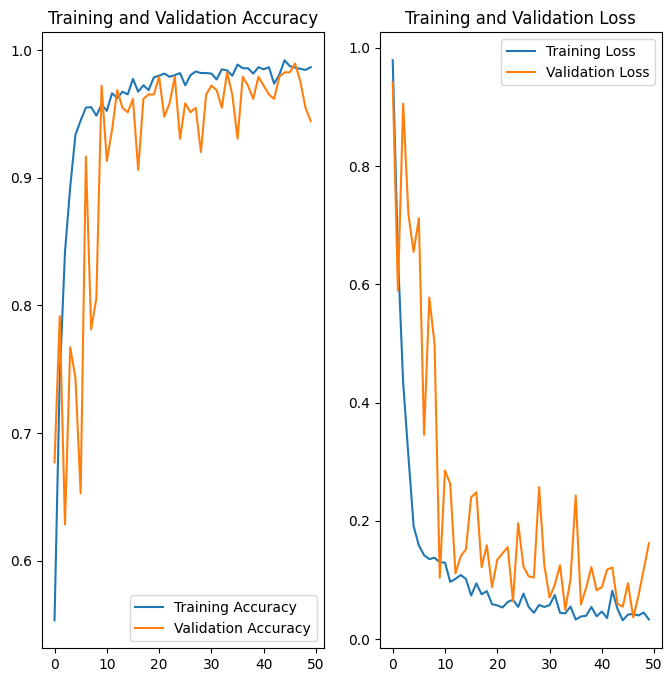

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [33]:
model.save('corn1.h5')

c:\Users\ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
